In [1]:

%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [2]:
%%R
install.packages("googledrive")
install.packages(c("caret","e1071","rpart","randomForest","caTools","descr"), repos='http://cran.us.r-project.org')
library("googledrive")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘gargle’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/gargle_0.4.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 180886 bytes (176 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to co

In [3]:
%%R
system("gdown --id 1TZxpPMBemLS4LFTLSWPR68Jpo7aaRMcy")
data = read.csv("hour.csv")
print(head(data))

  instant     dteday season yr mnth hr holiday weekday workingday weathersit
1       1 2011-01-01      1  0    1  0       0       6          0          1
2       2 2011-01-01      1  0    1  1       0       6          0          1
3       3 2011-01-01      1  0    1  2       0       6          0          1
4       4 2011-01-01      1  0    1  3       0       6          0          1
5       5 2011-01-01      1  0    1  4       0       6          0          1
6       6 2011-01-01      1  0    1  5       0       6          0          2
  temp  atemp  hum windspeed casual registered cnt
1 0.24 0.2879 0.81    0.0000      3         13  16
2 0.22 0.2727 0.80    0.0000      8         32  40
3 0.22 0.2727 0.80    0.0000      5         27  32
4 0.24 0.2879 0.75    0.0000      3         10  13
5 0.24 0.2879 0.75    0.0000      0          1   1
6 0.24 0.2576 0.75    0.0896      0          1   1


In [4]:
%%R
install.packages("ggplot")
library('ggplot2')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
%%R
summary(data)


    instant             dteday          season            yr        
 Min.   :    1   2011-01-01:   24   Min.   :1.000   Min.   :0.0000  
 1st Qu.: 4346   2011-01-08:   24   1st Qu.:2.000   1st Qu.:0.0000  
 Median : 8690   2011-01-09:   24   Median :3.000   Median :1.0000  
 Mean   : 8690   2011-01-10:   24   Mean   :2.502   Mean   :0.5026  
 3rd Qu.:13034   2011-01-13:   24   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :17379   2011-01-15:   24   Max.   :4.000   Max.   :1.0000  
                 (Other)   :17235                                   
      mnth              hr           holiday           weekday     
 Min.   : 1.000   Min.   : 0.00   Min.   :0.00000   Min.   :0.000  
 1st Qu.: 4.000   1st Qu.: 6.00   1st Qu.:0.00000   1st Qu.:1.000  
 Median : 7.000   Median :12.00   Median :0.00000   Median :3.000  
 Mean   : 6.538   Mean   :11.55   Mean   :0.02877   Mean   :3.004  
 3rd Qu.:10.000   3rd Qu.:18.00   3rd Qu.:0.00000   3rd Qu.:5.000  
 Max.   :12.000   Max.   :23.00   Max.  

In [6]:
%%R
print(dim(data))
print(names(data))

[1] 17379    17
 [1] "instant"    "dteday"     "season"     "yr"         "mnth"      
 [6] "hr"         "holiday"    "weekday"    "workingday" "weathersit"
[11] "temp"       "atemp"      "hum"        "windspeed"  "casual"    
[16] "registered" "cnt"       


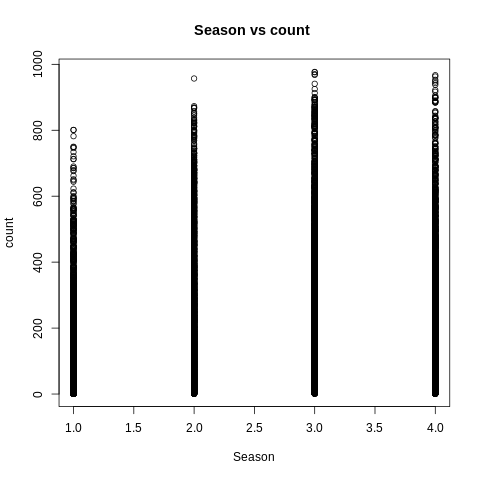

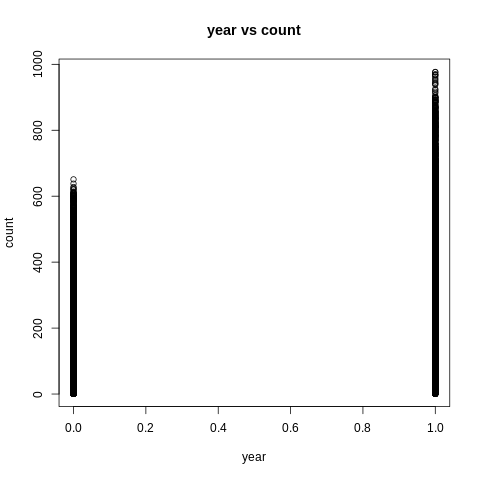

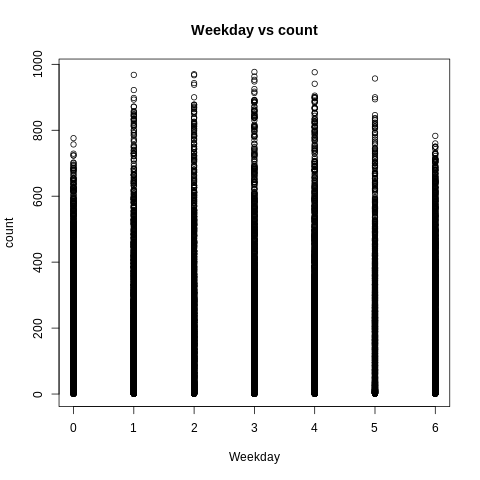

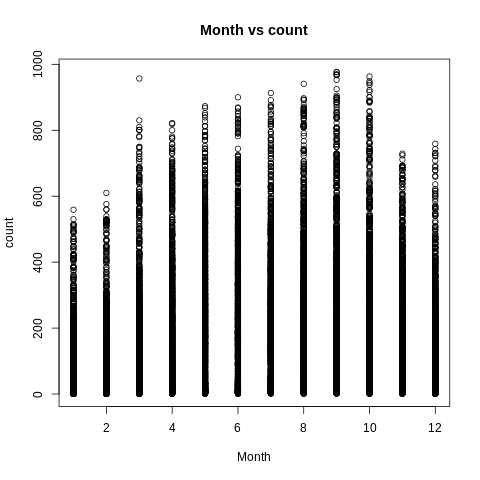

In [7]:
%%R
plot(data$season,data$cnt,main="Season vs count ",xlab="Season",ylab="count") 

plot(data$yr,data$cnt,main="year vs count",xlab="year",ylab="count") 

plot(data$weekday,data$cnt,main="Weekday vs count",xlab="Weekday",ylab="count") 

plot(data$mnth,data$cnt,main="Month vs count",xlab="Month",ylab="count")    



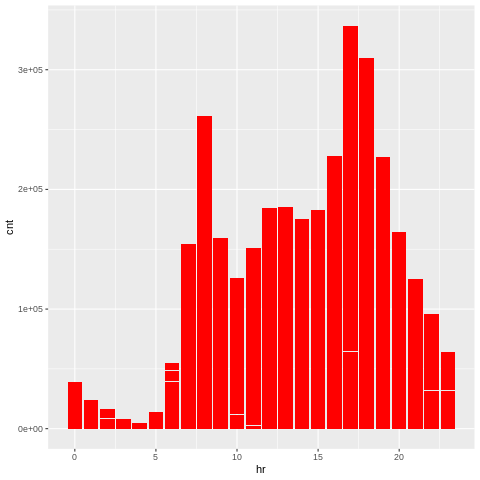

In [8]:
%%R
ggplot(data, aes(x=hr ,y=cnt)) + geom_histogram(binwidth=.4,stat ='identity',fill= 'red')

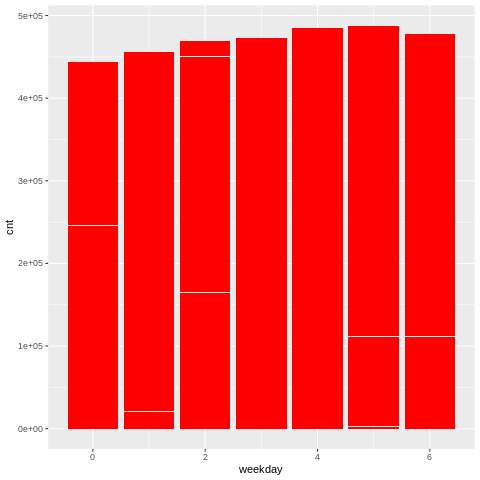

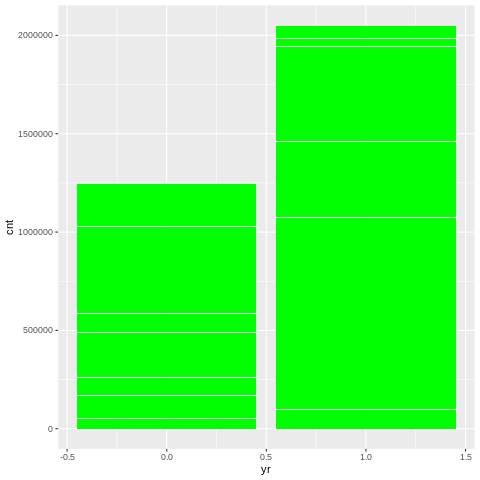

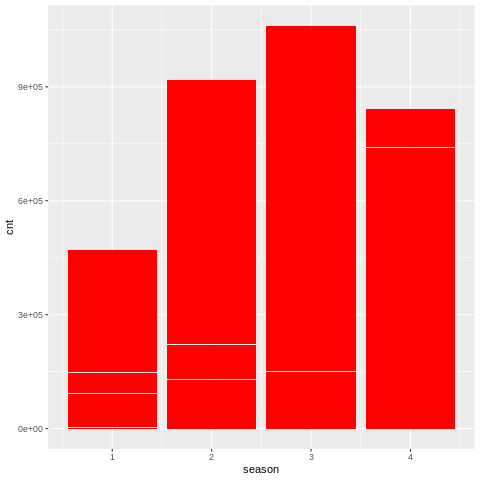

In [9]:
%%R
print(ggplot(data, aes(x=weekday ,y=cnt)) + geom_histogram(binwidth=.2,stat ='identity',fill= 'red'))


print(ggplot(data, aes(x=yr ,y=cnt)) + geom_histogram(binwidth=.1,stat ='identity',fill= 'green'))

print(ggplot(data, aes(x=season ,y=cnt)) + geom_histogram(binwidth=.2,stat ='identity',fill= 'red'))

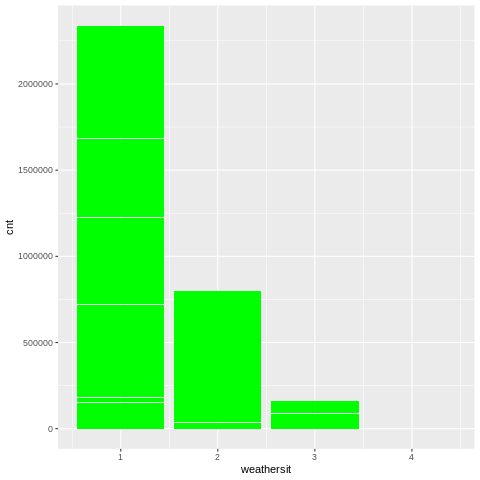

In [10]:
%%R
print(ggplot(data, aes(x=weathersit ,y=cnt)) + geom_histogram(binwidth=.2,stat ='identity',fill= 'green'))

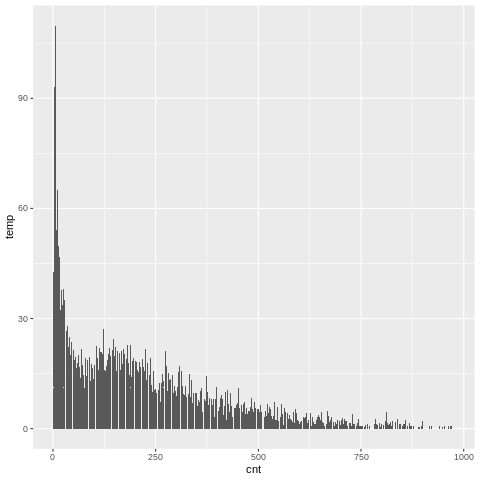

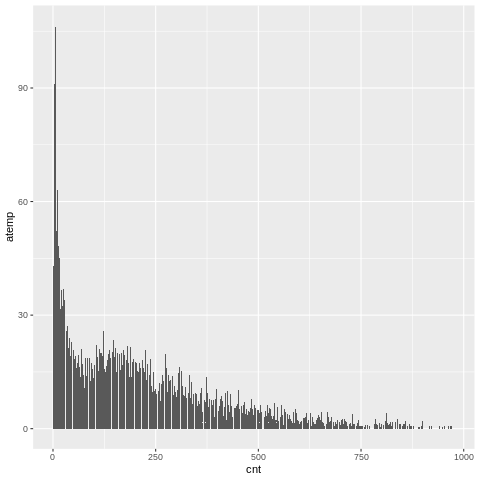

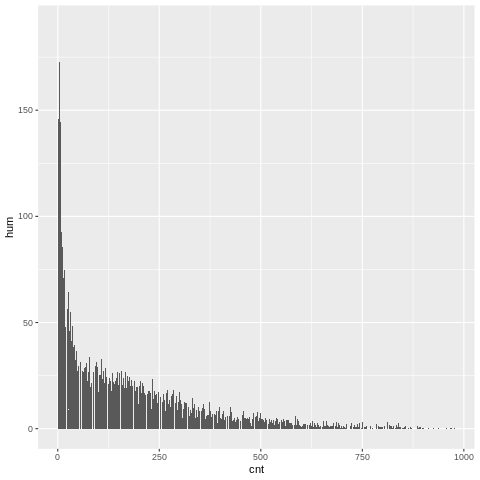

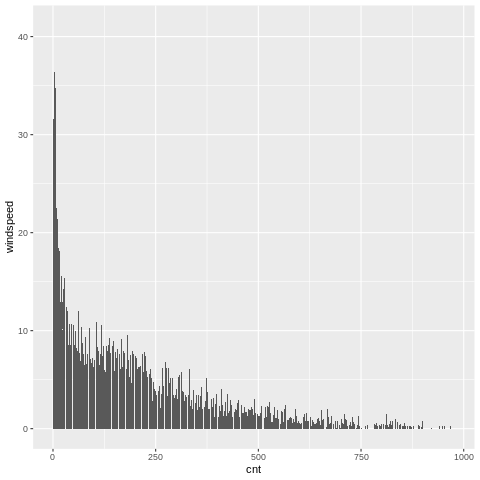

In [11]:
%%R
cl = list('temp',  'atemp'  ,'hum' ,'windspeed')
for (i in cl) {
print(ggplot(data, aes_string(x="cnt",y=i)) + geom_histogram(binwidth=.4,stat ='identity'))
}

NULL
NULL
NULL


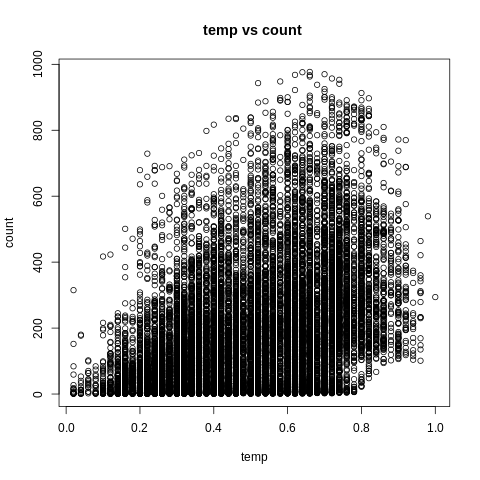

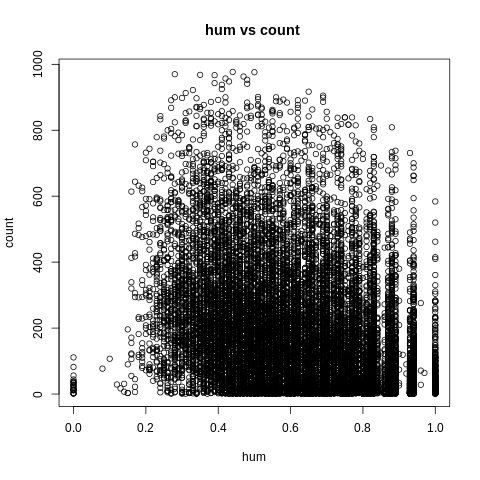

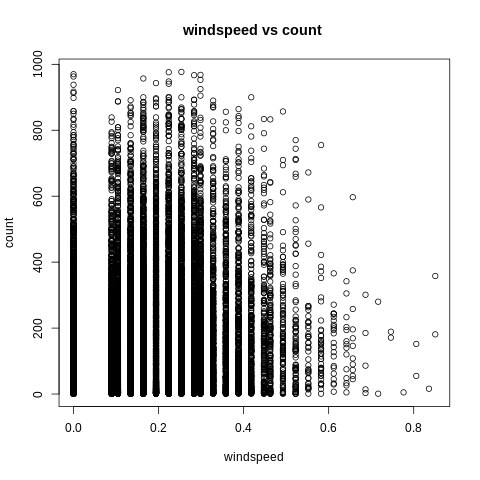

In [12]:
%%R
print(plot(data$temp,data$cnt,main="temp vs count ",xlab="temp",ylab="count")) 
print(plot(data$hum,data$cnt,main="hum vs count ",xlab="hum",ylab="count") )
print(plot(data$windspeed,data$cnt,main="windspeed vs count ",xlab="windspeed",ylab="count") )


In [13]:
%%R
library('caret') 
library('e1071')
library('rpart')
library('randomForest')
library('caTools')
library('descr')

R[write to console]: Loading required package: lattice

R[write to console]: randomForest 4.6-14

R[write to console]: Type rfNews() to see new features/changes/bug fixes.

R[write to console]: 
Attaching package: ‘randomForest’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    margin




In [0]:
%%R
d <- data

In [15]:
%%R
#convert day to dates
data$dteday=as.Date(data$dteday)
class(data$dteday)

#as.factor, convert season and weathersit to factor
data$season=factor(data$season, labels = c("Spring", "Summer", "Fall", "Winter"))
table(data$season)

data$weathersit=factor(data$weather, labels = c("Good", "Normal", "Bad", "Very Bad"))
table(data$weathersit)



    Good   Normal      Bad Very Bad 
   11413     4544     1419        3 


In [0]:
%%R
d <- data

In [0]:
%%R
set.seed(2262)
sample <- sample.int(n = nrow(data), size = floor(.8*nrow(data)), replace = F)
train <- d[sample, ]
test  <- d[-sample, ]


In [18]:
%%R
mod = lm(cnt~.-instant-casual-registered-yr-dteday, data=train)
print(mod)


Call:
lm(formula = cnt ~ . - instant - casual - registered - yr - dteday, 
    data = train)

Coefficients:
       (Intercept)        seasonSummer          seasonFall        seasonWinter  
           15.9045             13.9163            -17.3631             61.6041  
              mnth                  hr             holiday             weekday  
           -0.2445              7.2263            -21.5043              1.9103  
        workingday    weathersitNormal       weathersitBad  weathersitVery Bad  
            4.3347             12.0447            -24.0990             74.4943  
              temp               atemp                 hum           windspeed  
          259.5628            147.7666           -215.0567             22.1192  



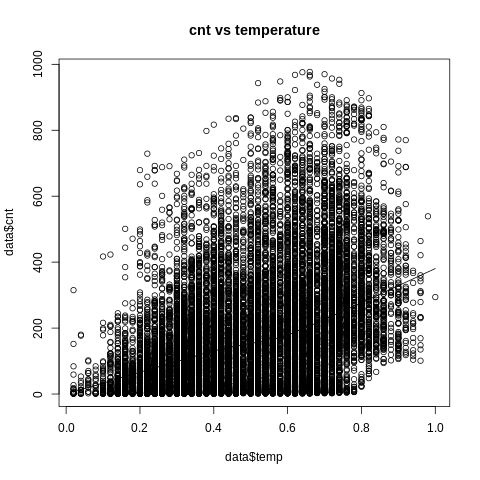

In [19]:
%%R
scatter.smooth(x=data$temp, y=data$cnt, main="cnt vs temperature")